In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
data = {
    'feature 1':[1,2,3,4,5],
    'feature 2':[6,7,8,9,10],
    'feature 3':[11,12,13,14,15]
}
df = pd.DataFrame(data)
df

,feature 1,feature 2,feature 3
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [5]:
x = df[['feature 1', 'feature 2', 'feature 3']]
# y = df['target variable']

In [7]:
scaler = StandardScaler().fit_transform(x)
scaler

array([[-1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356]])

In [9]:
scaled_df = pd.DataFrame(scaler, columns=df.columns)
scaled_df

,feature 1,feature 2,feature 3
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [11]:
n_components = 2
pca = PCA(n_components=n_components)

In [13]:
x_pca = pca.fit_transform(scaled_df)
x_pca

array([[-2.44948974e+00, -1.71995011e-16],
       [-1.22474487e+00,  5.73316705e-17],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.22474487e+00, -5.73316705e-17],
       [ 2.44948974e+00, -1.14663341e-16]])

In [15]:
x_pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range (n_components)])
x_pca_df

,PC1,PC2
0,-2.449490,-1.719950e-16
1,-1.224745,5.733167e-17
2,0.000000,0.000000e+00
3,1.224745,-5.733167e-17
4,2.449490,-1.146633e-16


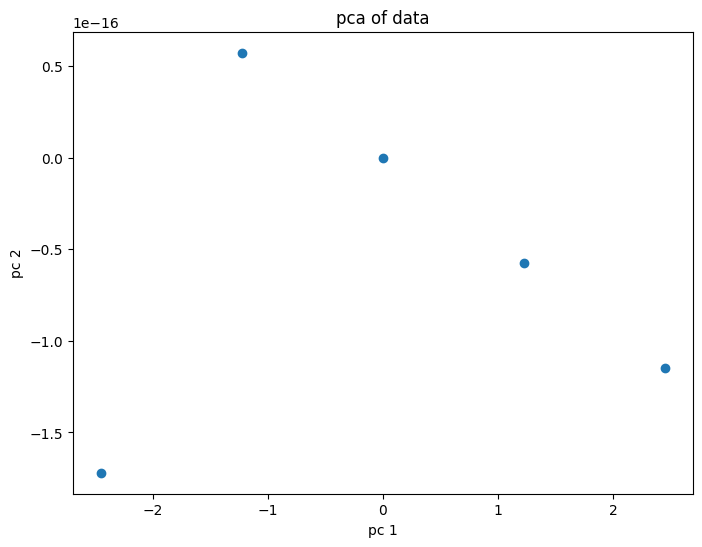

In [16]:
if n_components == 2:
    plt.figure(figsize=(8,6))
    plt.scatter(x_pca[:,0], x_pca[:,1])
    plt.xlabel('pc 1')
    plt.ylabel('pc 2')
    plt.title('pca of data')
    plt.show()

In [19]:
pca_all = PCA()
X_pca_all = pca_all.fit_transform(scaled_df)
explained_variance_ratio_all = pca_all.explained_variance_ratio_

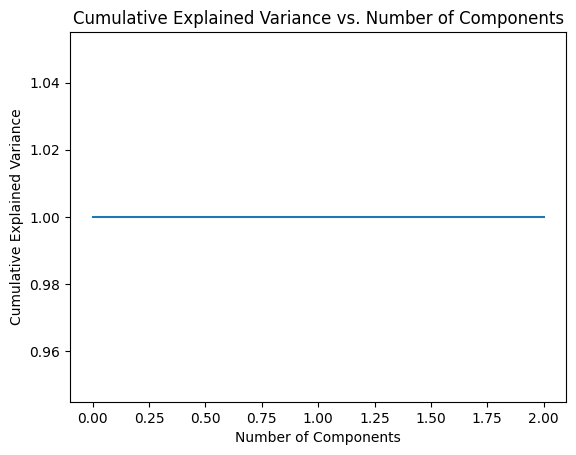

In [20]:
plt.plot(np.cumsum(explained_variance_ratio_all))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()